In [1]:
# Python 3 notebook

import keras
import tensorflow as tf
import imageio
import ffmpy
import numpy as np
import pandas as pd
from numpy import fft as fft
from scipy.fftpack import fft, ifft, rfft, irfft, fftfreq, fftshift
from scipy import fftpack
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
import scipy.io.wavfile
from scipy import signal as signal
from scipy.signal import butter, lfilter
import pylab
from pylab import *
import IPython.display
import os
from sklearn.decomposition import PCA
import csv

# # Nussl
# import nussl

# # Pyfasst
# import setuptools
# from distutils.core import setup
# from distutils.extension import Extension
# import pyfasst.audioModel as am

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display
from __future__ import print_function

Using TensorFlow backend.


## This will create 2 channels from a wav input.

In [2]:
# from scipy.io.wavfile import read
# samprate, wavdata = read('/Users/brianschneider/Desktop/capstone/gameSummarizer/output_audio.wav')
# channel1=wavdata[:,0] #left
# channel2=wavdata[:,1] #right

# print("Sample rate:{0}, data size:{1}, duration:{2} seconds".format(samprate,channel1.shape,len(channel1)/samprate))

## My first goal is to take a fourier transform and break it into seconds and record an array of samples from each second. These will be x-labels.

## Comment out to write a CSV that generates all relevant x-label information. [Make sure you get the directory right!]

In [3]:
# data_size = channel1.shape
# for i in range(0,duration):
#     test.append(i)
    
# Loads wav file as array.
# fileName = '/Users/brianschneider/Desktop/capstone/gameSummarizer/output_audio.wav'
# sample_rate, data = read(fileName)
 
# Creating a loop to extract the samples from each second of each game in my audio directory.

test = []
# arrays = []

# dataCSV = open('ProgramCheck1.csv', 'w') 
# writer = csv.writer(dataCSV, dialect='excel')
# writer.writerow(['File', 'Second', 'Samples']) 

# df = pd.DataFrame(columns=('file', 'second', 'array'))

for files in os.listdir('/Users/brianschneider/Desktop/capstone/gameSummarizer/audiofiles/'):
    if files.endswith(".wav"): 
        fileName = '/Users/brianschneider/Desktop/capstone/gameSummarizer/audiofiles/'+files
        samprate, wavdata = scipy.io.wavfile.read(fileName)
        channel1=wavdata[:,0] #left
        duration = 2 #int(len(channel1)/samprate)
#         channel2=wavdata[:,1] #right
        for i in range(0, duration):
            seconds_to_extract = 1
            N = seconds_to_extract * samprate

            # Knowing N and sample rate, fftfreq gets the frequency
            # Associated to each FFT unit.
            f = scipy.fftpack.fftfreq(N, 1.0/samprate)

            # Extracts fourier transform data from the sample
            # returning the spectrum analysis
            subdata = wavdata[i*samprate:(i+1)*samprate]
            F = scipy.fftpack.fft(subdata)
            F = np.abs(F)
#             F = [np.real(c) for c in F]
            game = []
            game.append(files)
            game.append(i)
            game.append(F)
            test.append(game)
#             arrays.append(F)
#             writer.writerow([files, i, np.array(F)])
            
#             df = df.append({"file": files, "second":  i, "array": F}, ignore_index=True)

In [4]:
# # # print(test[0:10])
# # # len(test)

# with open('ProgramCheck1.csv', 'rb') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         print(row)

f = scipy.fftpack.fftfreq(N, 1.0/samprate)
f

array([ 0.,  1.,  2., ..., -3., -2., -1.])

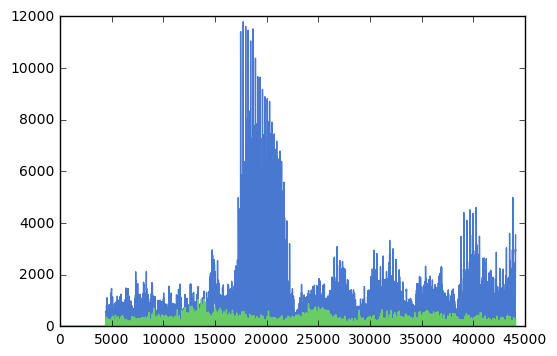

In [5]:
# df3 = pd.read_csv('ProgramCheck1.csv')
# df3.head()

plt.plot(test[2][2])

In [6]:
# df.head()
# # df['Freq'].dtype

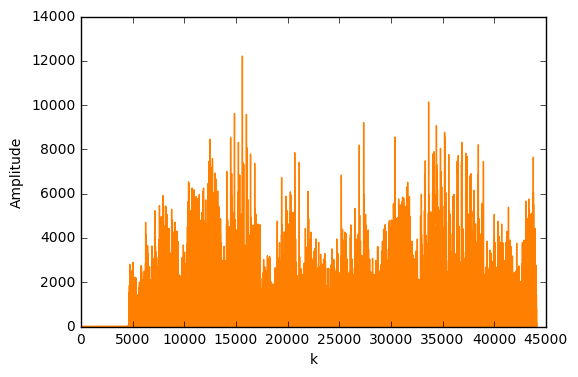

In [7]:
plt.plot(test[0][2], color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.show()

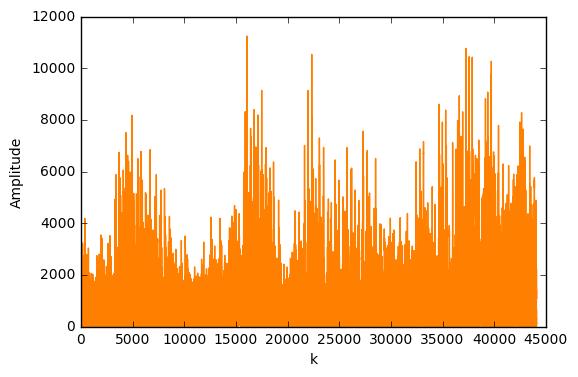

In [8]:
plt.plot(test[1][2], color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.show()

In [9]:
# df["Second"] = pd.to_numeric(df["Second"])
# df["Freq"] = pd.to_numeric(df["Freq"])
# df["Samples"] = pd.to_numeric(df["Samples"])

# print(test[0][2].dtype)

df1 = pd.DataFrame(test, columns=('file', 'second', 'array'))
# df1.to_csv("submission2.csv", index=False)

# plt.plot(df1['array'][0])

In [10]:
df1.head()
# df2 = pd.read_csv('submission2.csv')

,file,second,array
0,AUGBVB1.wav,0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0..."
1,AUGBVB1.wav,1,"[[1448.0, 70.0], [1324.0, 32.0], [548.0, 204.0..."
2,AUGBVB2.wav,0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0..."
3,AUGBVB2.wav,1,"[[3461.0, 269.0], [3216.0, 272.0], [3027.0, 26..."


In [26]:
f

array([ 0.,  1.,  2., ..., -3., -2., -1.])

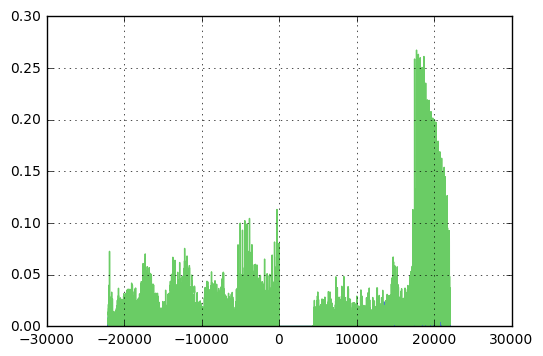

In [41]:
#charts fftfreq by fft

yf = test[2][2]
xf = f
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 1.0/44100 * np.abs(yplot))
plt.grid()
plt.show()

In [12]:
df1['array'][2][40000:]

array([[ 2229.,     7.],
       [ 2154.,     4.],
       [ 2124.,    24.],
       ..., 
       [ 3390.,   230.],
       [ 3495.,   243.],
       [ 3546.,   264.]])

In [13]:
df1['array'][2].shape

(44100, 2)

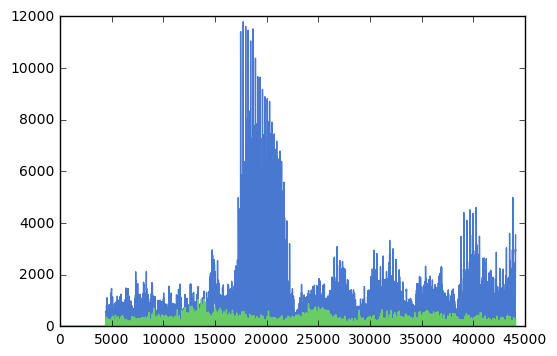

In [14]:
# # https://stackoverflow.com/questions/31794782/numpys-complex128-conversion
# # [c.real for c in test]
plt.plot(df1['array'][2])

In [39]:
# plt.plot(df1['array'][7])
# plt.semilogy(df1['array'][2])

In [16]:
# shape(arrays)

In [17]:
# pca = PCA(n_components=3)
# pca.fit(test[1][2])
# arrays = pca.transform(arrays)

## My second goal is to create a y-label column based on goals at specific time stamps in a game. I will add these manually w/ a binary flag.
## My third goal is to train a data set based on x-labels and y-labels.
## My fourth goal is to try and apply the model to a test game and see how the predictions fare.

## Do I want to try PCA before moving too far ahead?

## http://gonzalopla.com/python-for-digital-signal-processing/

This example does what I want to do.

## https://pypi.python.org/pypi/QSpectrumAnalyzer

Also worth checking out if it has an output function.

## http://pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/

Might be worth a look.

In [18]:
# print(wave_file_list[1].shape)

In [19]:
# Y = channel1.reshape(-1, 1)
# pca = PCA(n_components=0)
# pca.fit(Y)
# tyr = PCA(copy=True, iterated_power='auto', n_components=0, random_state=None,
#   svd_solver='full', tol=0.0, whiten=False)
# print(tyr)
# # print(pca.explained_variance_ratio_)  
# # # [ 0.99244...  0.00755...]
# # print(pca.singular_values_)  
# # # [ 6.30061...  0.54980...]

In [20]:
# pca = PCA(n_components=2)
# pca.fit(fourier)   
# PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
#   svd_solver='auto', tol=0.0, whiten=False)
# print(pca.explained_variance_ratio_)  
# print(pca.singular_values_) 

## APPENDIX

In [21]:
# #http://myinspirationinformation.com/uncategorized/audio-signals-in-python/
# from scipy.io.wavfile import read
# wave_file_list = []
# for filename in os.listdir('/Users/brianschneider/Desktop/capstone/gameSummarizer/audiofiles'):
#     if filename.endswith(".wav"): 
#         samprate, wavdata = read(filename)
#         channel1=wavdata[:,0] #left
#         channel2=wavdata[:,1] #right
#         # time = np.arange(0, float(wavdata.shape[0]), 1) / samprate
#         fourier=np.fft.fft(channel1)
#         n = channel1.size
#         timestep = 1.0
#         freq = np.fft.fftfreq(n, d=timestep)
#         wave_file_list.append(freq)
#         len(freq)
#         continue
#     else:
#         continue

In [22]:
# import scipy.io
 
# # Package that implements the fast
# # fourier transform functions.
# from scipy import fftpack
# import numpy as np
 
# # Loads wav file as array.
# fileName = '/Users/brianschneider/Desktop/capstone/gameSummarizer/output_audio.wav'
# sample_rate, data = read(fileName)
 
# # Extracting 10 seconds. N is the numbers of samples to
# # extract or elements from the array.
# seconds_to_extract = 10
# N = seconds_to_extract * sample_rate
 
# # Knowing N and sample rate, fftfreq gets the frequency
# # Associated to each FFT unit.
# f = fftpack.fftfreq(N, 1.0/sample_rate)
 
# # Extracts fourier transform data from the sample
# # returning the spectrum analysis
# subdata = data[:N]
# F = fftpack.fft(subdata)

# fig, ax = plt.subplots()

# ax.stem(f, np.abs(F))
# ax.set_xlabel('Frequency in Hertz [Hz]')
# ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
# ax.set_xlim(-sample_rate / 2, sample_rate / 2)
# ax.set_ylim(-5, 110)

In [23]:
# f_s = 100
# signal = channel1
# fourier = np.fft.fft(signal)
# n = signal.size
# timestep = 1.0
# freqs = np.fft.fftfreq(n, d=timestep)
# # freq

# fig, ax = plt.subplots()

# ax.stem(freqs, np.abs(fourier))
# ax.set_xlabel('Frequency in Hertz [Hz]')
# ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
# ax.set_xlim(-f_s / 2, f_s / 2)
# ax.set_ylim(-5, 110)
